## import the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Amazon.csv')

print(df.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

C:\Users\utente\AppData\Local\Temp\ipykernel_3392\3904716860.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Amazon.csv')


برای اینکه دیتا تایپ حل بشه می شد مقدار داد اما چون داده استفاده نمی شد حذف شد

## Data Cleaning and Normalize

In [3]:
columns_to_drop = ['index', 'Unnamed: 22', 'promotion-ids', 'ship-postal-code', 'fulfilled-by', 'B2B']
df = df.drop(columns=columns_to_drop)
df.set_index('Date', inplace=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 04-30-22 to 05-31-22
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Status              128975 non-null  object 
 2   Fulfilment          128975 non-null  object 
 3   Sales Channel       128975 non-null  object 
 4   ship-service-level  128975 non-null  object 
 5   Style               128975 non-null  object 
 6   SKU                 128975 non-null  object 
 7   Category            128975 non-null  object 
 8   Size                128975 non-null  object 
 9   ASIN                128975 non-null  object 
 10  Courier Status      122103 non-null  object 
 11  Qty                 128975 non-null  int64  
 12  currency            121180 non-null  object 
 13  Amount              121180 non-null  float64
 14  ship-city           128942 non-null  object 
 15  ship-state          128942 non

In [4]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
print(df_cleaned.info())
df_cleaned.to_csv('../Amazon.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 116013 entries, 04-30-22 to 05-31-22
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            116013 non-null  object 
 1   Status              116013 non-null  object 
 2   Fulfilment          116013 non-null  object 
 3   Sales Channel       116013 non-null  object 
 4   ship-service-level  116013 non-null  object 
 5   Style               116013 non-null  object 
 6   SKU                 116013 non-null  object 
 7   Category            116013 non-null  object 
 8   Size                116013 non-null  object 
 9   ASIN                116013 non-null  object 
 10  Courier Status      116013 non-null  object 
 11  Qty                 116013 non-null  int64  
 12  currency            116013 non-null  object 
 13  Amount              116013 non-null  float64
 14  ship-city           116013 non-null  object 
 15  ship-state          116013 non


در اینجا نام ستون‌ها و نوع داده‌ها  مشخص شده است:
Date: تاریخ
Order ID: رشته
Status: رشته
Fulfilment: رشته
Sales Channel: رشته
ship-service-level: رشته
Style: رشته
SKU: رشته
Category: رشته
Size: رشته
ASIN: رشته
Courier Status: رشته
Qty: عدد صحیح
currency: رشته
Amount: عدد اعشاری
ship-city: رشته
ship-state: رشته
ship-country: رشته

In [5]:
df_cleaned.index = pd.to_datetime(df_cleaned.index, format='%m-%d-%y')
df_cleaned['Day'] = df_cleaned.index.day_name()
print(df_cleaned.info())
df_cleaned.to_csv('../Amazon_cleaned.csv', index=True)
print(df_cleaned[['Day']].head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116013 entries, 2022-04-30 to 2022-05-31
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            116013 non-null  object 
 1   Status              116013 non-null  object 
 2   Fulfilment          116013 non-null  object 
 3   Sales Channel       116013 non-null  object 
 4   ship-service-level  116013 non-null  object 
 5   Style               116013 non-null  object 
 6   SKU                 116013 non-null  object 
 7   Category            116013 non-null  object 
 8   Size                116013 non-null  object 
 9   ASIN                116013 non-null  object 
 10  Courier Status      116013 non-null  object 
 11  Qty                 116013 non-null  int64  
 12  currency            116013 non-null  object 
 13  Amount              116013 non-null  float64
 14  ship-city           116013 non-null  object 
 15  ship-state        

# Diagrams, Charts


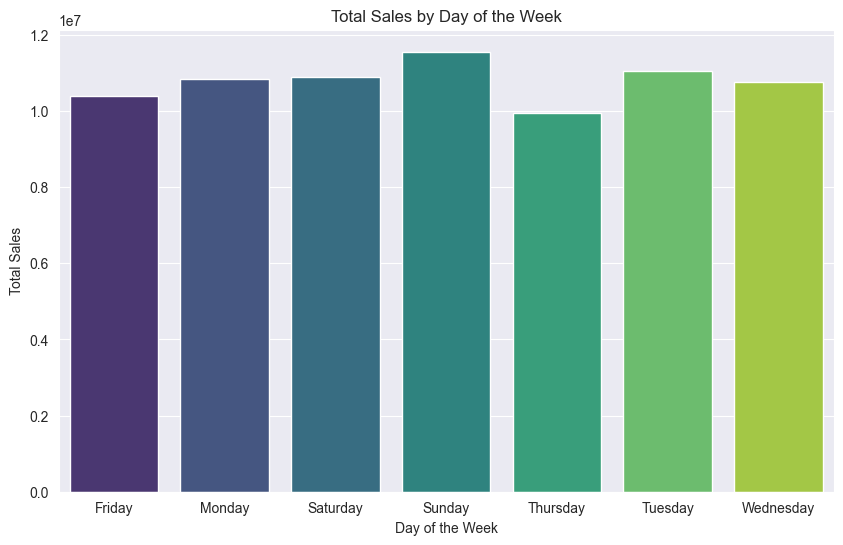

In [6]:
weekly_sales = df_cleaned.groupby('Day')['Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Amount', data=weekly_sales, hue='Day', palette='viridis', legend=False)
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

نمودار نشون میده بیشترین فروش برای یکشنبه است که این نشون میده تعطیلات پایان هفته باعث افزایش فروش میشه

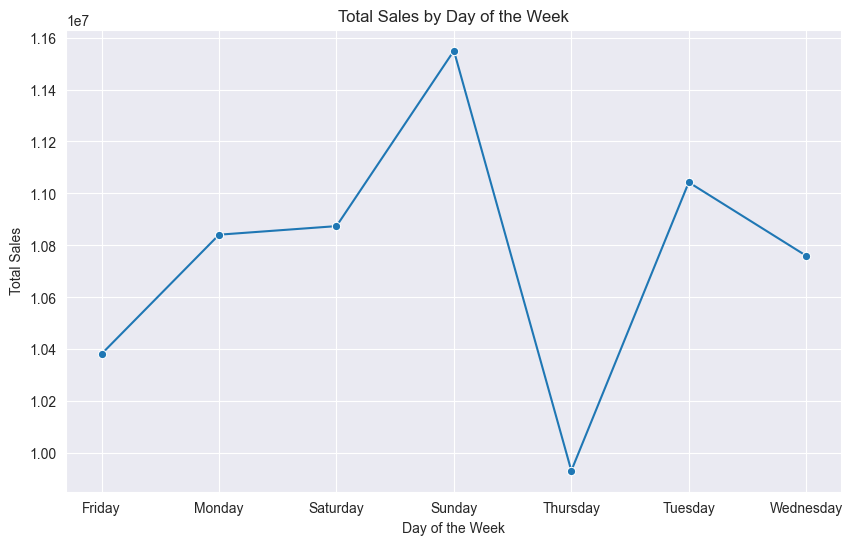

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Amount', data=weekly_sales, marker='o')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


بیشترین فروش مربوط به روز یکشنبه و کمترین فروش به روز پنجشنبه است

  می‌توان از این اطلاعات برای بهبود استراتژی‌های بازاریابی استفاده کرد برای مثال ایجاد تخفیف برای روز پنج شنبه

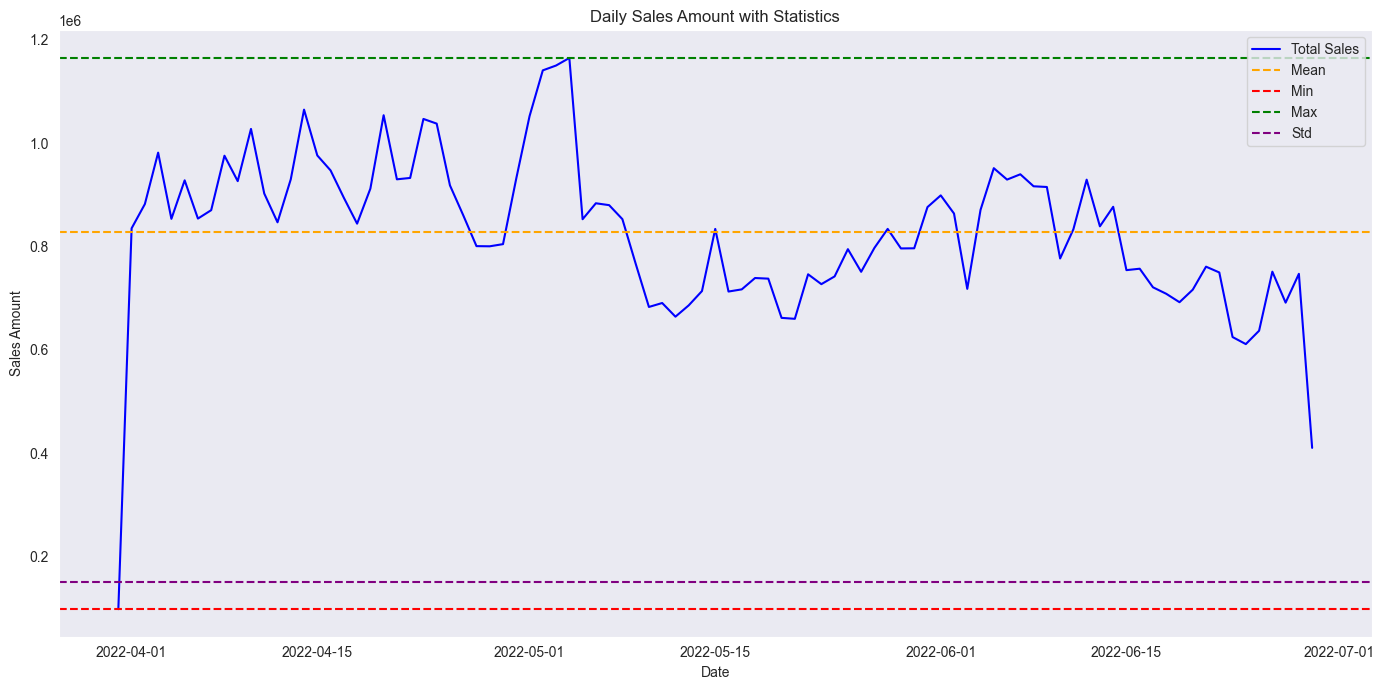

Mean: 828377.3626373627
Min: 98261.0
Max: 1165038.0
Std: 151225.41664581507


In [8]:
daily_sales = df_cleaned.resample('D').sum()

mean_sales = daily_sales['Amount'].mean()
min_sales = daily_sales['Amount'].min()
max_sales = daily_sales['Amount'].max()
std_sales = daily_sales['Amount'].std()

plt.figure(figsize=(14, 7))

sns.lineplot(x=daily_sales.index, y=daily_sales['Amount'], label='Total Sales', color='blue')

plt.axhline(y=mean_sales, color='orange', linestyle='--', label='Mean')
plt.axhline(y=min_sales, color='red', linestyle='--', label='Min')
plt.axhline(y=max_sales, color='green', linestyle='--', label='Max')
plt.axhline(y=std_sales, color='purple', linestyle='--', label='Std')

plt.title('Daily Sales Amount with Statistics')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
print(f"Mean: {mean_sales}")
print(f"Min: {min_sales}")
print(f"Max: {max_sales}")
print(f"Std: {std_sales}")

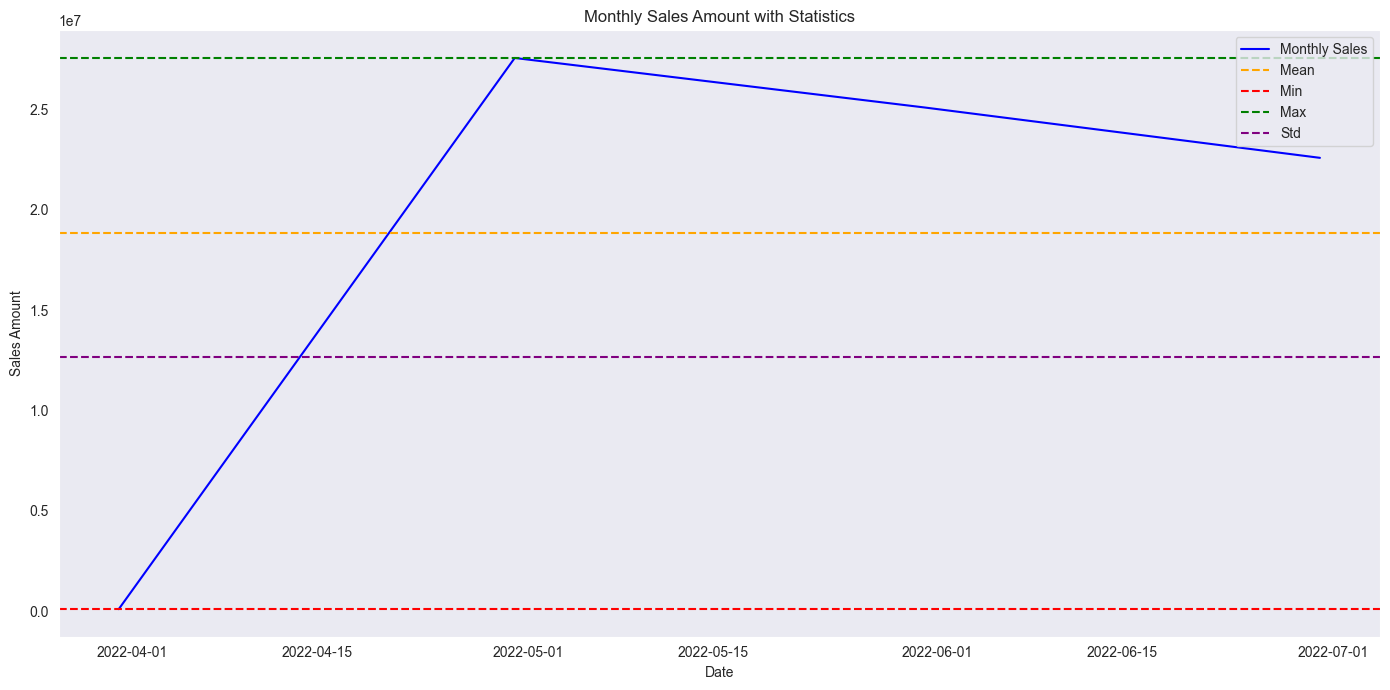

In [9]:
df_cleaned['Month'] = df_cleaned.index.month
df_cleaned['Year'] = df_cleaned.index.year

monthly_sales = df_cleaned.resample('ME').sum()
mean_monthly_sales = monthly_sales['Amount'].mean()
min_monthly_sales = monthly_sales['Amount'].min()
max_monthly_sales = monthly_sales['Amount'].max()
std_monthly_sales = monthly_sales['Amount'].std()

plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_sales.index, y=monthly_sales['Amount'], label='Monthly Sales', color='blue')
plt.axhline(y=mean_monthly_sales, color='orange', linestyle='--', label='Mean')
plt.axhline(y=min_monthly_sales, color='red', linestyle='--', label='Min')
plt.axhline(y=max_monthly_sales, color='green', linestyle='--', label='Max')
plt.axhline(y=std_monthly_sales, color='purple', linestyle='--', label='Std')
plt.title('Monthly Sales Amount with Statistics')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


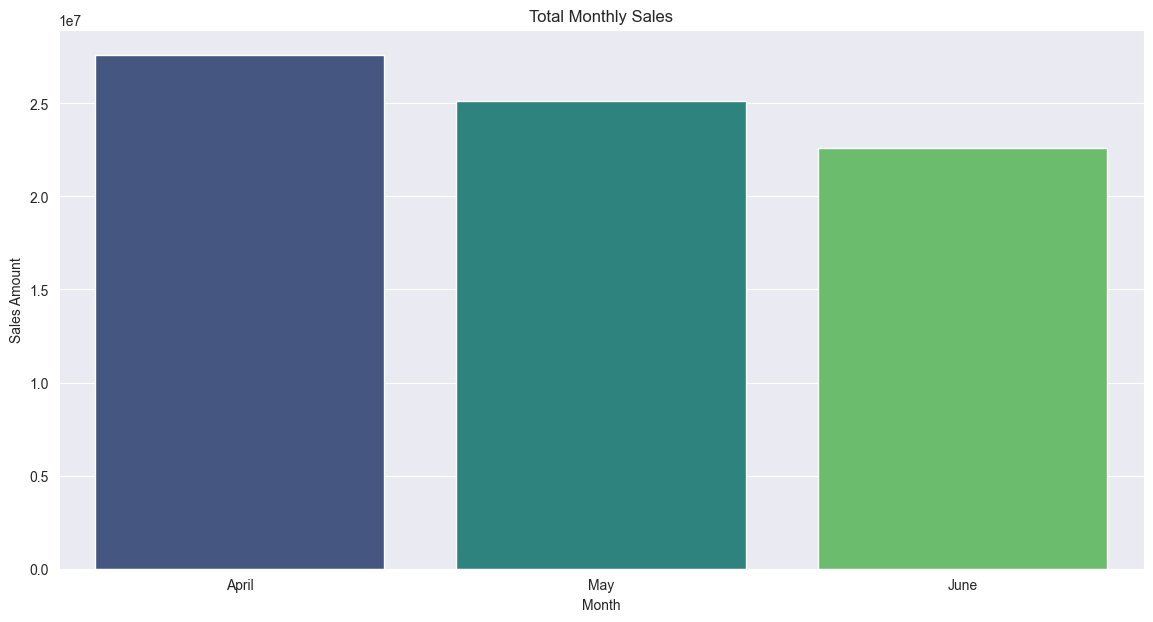

In [16]:
monthly_sales = df_cleaned.resample('ME').sum()
monthly_sales = monthly_sales[monthly_sales.index.month != 3]
plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_sales.index.strftime('%B'), y=monthly_sales['Amount'], hue=monthly_sales.index.strftime('%B'), palette='viridis', legend=False)
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')


plt.show()


بیشترین فروش مربوط به ماه آوریل است
دلیل اینکه فروش زیاد است این است که در برخی کشورها  ماه آوریل  شامل جشن‌ها یا تعطیلات خاصی مانند عید پاک یا تعطیلات بهاری باشد که می‌تواند باعث افزایش خریدها

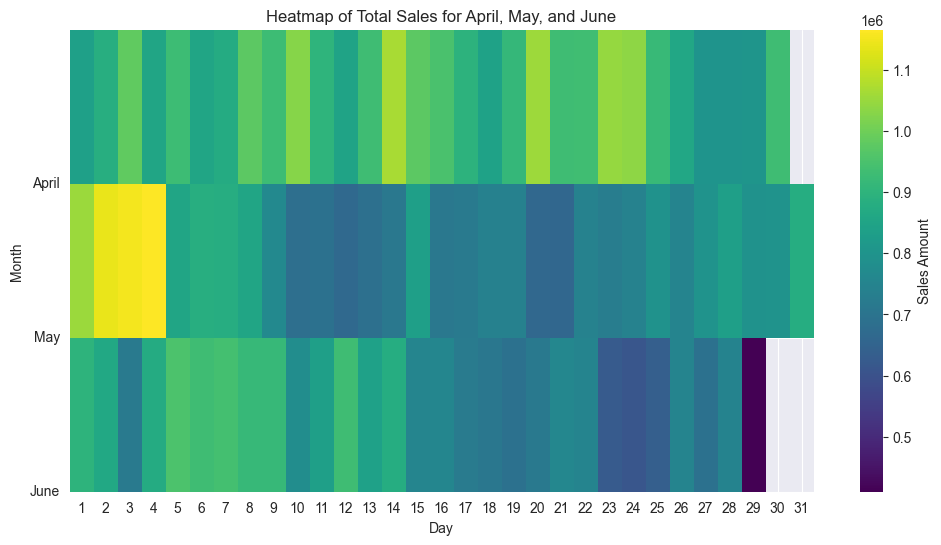

In [18]:
months_data = df_cleaned[df_cleaned.index.month.isin([4, 5, 6])]

daily_sales = months_data.resample('D').sum()

sales_matrix = daily_sales['Amount'].values.reshape(-1, 1)

sales_df = pd.DataFrame(sales_matrix, columns=['Amount'], index=daily_sales.index)

plt.figure(figsize=(12, 6))
sns.heatmap(sales_df.pivot_table(index=daily_sales.index.month, columns=daily_sales.index.day, values='Amount'),
            cmap='viridis', cbar_kws={'label': 'Sales Amount'})

plt.title('Heatmap of Total Sales for April, May, and June')
plt.xlabel('Day')
plt.ylabel('Month')
plt.yticks(ticks=[1, 2, 3], labels=['April', 'May', 'June'], rotation=0)
plt.xticks(rotation=0)
plt.show()

همچنان نشون دهنده این است که یکشنبه و ماه می فروش بیشتر است